<a href="https://colab.research.google.com/github/mdtanjimrahman/Natural-Language-Processing/blob/main/Natural_Text_Processing_movie_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string
import re
import spacy
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/Colab Notebooks/NLP/moviereviews.csv'
df = pd.read_csv(file_path)

print("Dataset shape:", df.shape)
print("\nLabel distribution:")
print(df['label'].value_counts())
pd.set_option('display.max_colwidth', None)
df.head()

Dataset shape: (2000, 2)

Label distribution:
label
neg    1000
pos    1000
Name: count, dtype: int64


label  \
0   neg   
1   neg   
2   pos   
3   pos   
4   neg   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [ ]:
# Punctuation Removal
def clean_raw_text(text):
    text = str(text)
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)  # remove punctuations except space
    text = re.sub(r"\s+", " ", text).strip()    # remove extra whitespaces
    return text

df['clean_text'] = df['review'].apply(clean_raw_text)
df['clean_text'].head()

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       how do films like mouse hunt get into theatres isnt there a law or something this diabolical load of claptrap from steven speilbergs dreamworks studio is hollywood family fare at its deadly worst mouse hunt takes the bare threads of a plot and tries to prop it up with overacting and flatout stupid slapstick that makes comedies like jingle all the way look decent by comparison writer adam rifkin and director gore verbinski are the names chiefly responsible for this swill the plot for what its worth concerns two brothers nathan lane and an appalling lee evens who inherit a poorly run string factory and a seemingly worthless house from their eccentric father deciding to check out the longabandoned house they soon learn that its worth a fortune and set about selling it in auction to the highest bidder but battling th

In [ ]:
# Tokenization
df['review'] = df['review'].astype(str)  # Convert the 'review' column to string type

df['tokens'] = df['clean_text'].apply(word_tokenize)
df[['tokens']].head()

,tokens
0,"[how, do, films, like, mouse, hunt, get, into, theatres, isnt, there, a, law, or, something, this, diabolical, load, of, claptrap, from, steven, speilbergs, dreamworks, studio, is, hollywood, family, fare, at, its, deadly, worst, mouse, hunt, takes, the, bare, threads, of, a, plot, and, tries, to, prop, it, up, with, overacting, and, flatout, stupid, slapstick, that, makes, comedies, like, jingle, all, the, way, look, decent, by, comparison, writer, adam, rifkin, and, director, gore, verbinski, are, the, names, chiefly, responsible, for, this, swill, the, plot, for, what, its, worth, concerns, two, brothers, nathan, lane, and, an, appalling, lee, evens, who, inherit, a, ...]"
1,"[some, talented, actresses, are, blessed, with, a, demonstrated, wide, acting, range, while, others, almost, as, gifted, have, more, limited, types, of, parts, for, which, they, are, suitable, as, was, amply, evident, after, basic, instinct, sharon, stone, can, play, sensual, roles, with, great, abandon, rejecting, her, natural, abilities, she, has, spent, the, rest, of, her, entire, career, trying, with, little, success, to, play, against, type, gloria, is, her, latest, disaster, babe, ruth, didnt, quit, baseball, after, one, season, to, play, football, in, a, quixotic, quest, to, prove, his, athletic, dexterity, and, neither, should, stone, reject, what, she, does, best, janeane, garofalo, ...]"
2,"[this, has, been, an, extraordinary, year, for, australian, films, shine, has, just, scooped, the, pool, at, the, australian, film, institute, awards, picking, up, best, film, best, actor, best, director, etc, to, that, we, can, add, the, gritty, life, the, anguish, courage, and, friendship, of, a, group, of, male, prisoners, in, the, hivpositive, section, of, a, jail, and, love, and, other, catastrophes, a, low, budget, gem, about, straight, and, gay, love, on, and, near, a, university, campus, i, cant, recall, a, year, in, which, such, a, rich, and, varied, celluloid, library, was, unleashed, from, australia, shine, was, one, bookend, stand, by, ...]"
3,"[according, to, hollywood, movies, made, in, last, few, decades, life, in, small, town, is, one, of, the, worst, things, that, could, happen, to, a, human, being, even, worse, fate, awaits, those, who, were, unfortunate, to, grow, up, in, those, dark, godforsaken, places, and, later, forced, to, live, forever, traumatised, by, the, experience, on, the, other, hand, it, seems, that, something, more, than, atlantic, ocean, divides, europe, from, america, because, one, of, the, most, popular, and, beloved, european, films, takes, exactly, the, opposite, view, this, film, is, amarcord, 1974, comedy, by, famous, italian, director, federico, fellini, which, later, gave, inspiration, to, ...]"
4,"[my, first, press, screening, of, 1998, and, already, ive, gotten, a, prime, candidate, for, my, worst, ten, of, the, year, list, what, an, auspicious, beginning, welcome, to, the, dog, days, of, winter, when, the, only, film, openings, of, merit, are, those, oscar, contenders, that, the, studios, opened, in, late, december, in, new, york, and, l, a, and, which, are, just, now, beginning, to, appear, elsewhere, firestorm, the, directorial, debut, of, dances, with, wolvess, academy, award, winning, cinematographer, dean, semler, is, the, first, of, the, new, years, crop, of, movies, as, our, story, opens, the, movie, pretentiously, informs, us, that, of, ...]"


In [ ]:
# Synonym Substitution
def get_synonym(word):
    synonyms = wordnet.synsets(word)
    if synonyms:
        return synonyms[0].lemmas()[0].name()
    return word

df['synonym_sub_tokens'] = df['tokens'].apply(lambda x: [get_synonym(word) for word in x])
df['synonym_sub_tokens'].head()

,synonym_sub_tokens
0,"[how, bash, movie, like, mouse, Hunt, get, into, theater, isnt, there, angstrom, law, Oregon, something, this, devilish, load, of, bombast, from, steven, speilbergs, dreamworks, studio, be, Hollywood, family, menu, astatine, information_technology, deadly, worst, mouse, Hunt, return, the, bare, togs, of, angstrom, plot, and, attempt, to, prop, information_technology, up, with, hamming, and, flatout, stupid, slapstick, that, brand, comedy, like, jingle, all, the, manner, expression, decent, by, comparison, writer, Adam, rifkin, and, director, Gore, verbinski, are, the, name_calling, chiefly, responsible, for, this, slop, the, plot, for, what, information_technology, worth, concern, two, brother, nathan, lane, and, Associate_in_Nursing, appalling, Lee, evening, World_Health_Organization, inherit, angstrom, ...]"
1,"[some, talented, actress, are, bless, with, angstrom, show, wide, acting, scope, while, others, about, arsenic, endow, rich_person, More, express, type, of, parts, for, which, they, are, suitable, arsenic, Washington, amply, apparent, after, BASIC, instinct, sharon, rock, can, play, animal, function, with, great, abandon, reject, her, natural, ability, she, hour_angle, spend, the, remainder, of, her, stallion, career, try, with, little, success, to, play, against, type, gloria, be, her, latest, catastrophe, baby, Ruth, didnt, discontinue, baseball, after, one, season, to, play, football, inch, angstrom, quixotic, pursuit, to, prove, his, athletic, dexterity, and, neither, should, rock, cull, what, she, Department_of_Energy, best, janeane, garofalo, ...]"
2,"[this, hour_angle, be, Associate_in_Nursing, extraordinary, year, for, Australian, movie, radiance, hour_angle, just, scoop, the, pool, astatine, the, Australian, movie, institute, award, picking, up, best, movie, best, actor, best, director, etc, to, that, we, can, attention_deficit_disorder, the, farinaceous, life, the, anguish, courage, and, friendship, of, angstrom, group, of, male, prisoner, inch, the, hivpositive, section, of, angstrom, jail, and, love, and, other, calamity, angstrom, low, budget, gem, about, heterosexual, and, homosexual, love, on, and, approach, angstrom, university, campus, iodine, buzzword, recall, angstrom, year, inch, which, such, angstrom, rich_people, and, change, celluloid, library, Washington, unleash, from, Australia, radiance, Washington, one, bookend, base, by, ...]"
3,"[harmonize, to, Hollywood, movie, make, inch, stopping_point, few, decade, life, inch, small, town, be, one, of, the, worst, things, that, could, happen, to, angstrom, homo, being, evening, worse, destiny, expect, those, World_Health_Organization, be, unfortunate, to, turn, up, inch, those, dark, godforsaken, topographic_point, and, later, coerce, to, populate, everlastingly, traumatize, by, the, experience, on, the, other, hand, information_technology, look, that, something, More, than, Atlantic, ocean, divide, Europe, from, United_States, because, one, of, the, most, popular, and, beloved, European, movie, return, precisely, the, antonym, position, this, movie, be, amarcord, 1974, comedy, by, celebrated, Italian, director, federico, Fellini, which, later, give, inspiration, to, ...]"
4,"[my, first, imperativeness, screening, of, 1998, and, already, ive, get, angstrom, prime, campaigner, for, my, worst, ten, of, the, year, list, what, Associate_in_Nursing, auspicious, beginning, welcome, to, the, dog, days, of, winter, when, the, lone, movie, opening, of, merit, are, those, Academy_Award, rival, that, the, studio, open, inch, late, December, inch, new, York, and, liter, angstrom, and, which, are, just, now, beginning, to, look, elsewhere, firestorm, the, directorial, introduction, of, dance, with, wolvess, academy, award, winning, cameraman, dean, semler, be, the, first, of, the, new, old_age, crop, of, movie, arsenic, our, narrative, open, the, movie, pretentiously, inform, United_States, that, of, ...]"


In [ ]:
# Case folding
df['case_folded_tokens'] = df['synonym_sub_tokens'].apply(lambda x: [word.lower() for word in x])
df['case_folded_tokens'].head()

,case_folded_tokens
0,"[how, bash, movie, like, mouse, hunt, get, into, theater, isnt, there, angstrom, law, oregon, something, this, devilish, load, of, bombast, from, steven, speilbergs, dreamworks, studio, be, hollywood, family, menu, astatine, information_technology, deadly, worst, mouse, hunt, return, the, bare, togs, of, angstrom, plot, and, attempt, to, prop, information_technology, up, with, hamming, and, flatout, stupid, slapstick, that, brand, comedy, like, jingle, all, the, manner, expression, decent, by, comparison, writer, adam, rifkin, and, director, gore, verbinski, are, the, name_calling, chiefly, responsible, for, this, slop, the, plot, for, what, information_technology, worth, concern, two, brother, nathan, lane, and, associate_in_nursing, appalling, lee, evening, world_health_organization, inherit, angstrom, ...]"
1,"[some, talented, actress, are, bless, with, angstrom, show, wide, acting, scope, while, others, about, arsenic, endow, rich_person, more, express, type, of, parts, for, which, they, are, suitable, arsenic, washington, amply, apparent, after, basic, instinct, sharon, rock, can, play, animal, function, with, great, abandon, reject, her, natural, ability, she, hour_angle, spend, the, remainder, of, her, stallion, career, try, with, little, success, to, play, against, type, gloria, be, her, latest, catastrophe, baby, ruth, didnt, discontinue, baseball, after, one, season, to, play, football, inch, angstrom, quixotic, pursuit, to, prove, his, athletic, dexterity, and, neither, should, rock, cull, what, she, department_of_energy, best, janeane, garofalo, ...]"
2,"[this, hour_angle, be, associate_in_nursing, extraordinary, year, for, australian, movie, radiance, hour_angle, just, scoop, the, pool, astatine, the, australian, movie, institute, award, picking, up, best, movie, best, actor, best, director, etc, to, that, we, can, attention_deficit_disorder, the, farinaceous, life, the, anguish, courage, and, friendship, of, angstrom, group, of, male, prisoner, inch, the, hivpositive, section, of, angstrom, jail, and, love, and, other, calamity, angstrom, low, budget, gem, about, heterosexual, and, homosexual, love, on, and, approach, angstrom, university, campus, iodine, buzzword, recall, angstrom, year, inch, which, such, angstrom, rich_people, and, change, celluloid, library, washington, unleash, from, australia, radiance, washington, one, bookend, base, by, ...]"
3,"[harmonize, to, hollywood, movie, make, inch, stopping_point, few, decade, life, inch, small, town, be, one, of, the, worst, things, that, could, happen, to, angstrom, homo, being, evening, worse, destiny, expect, those, world_health_organization, be, unfortunate, to, turn, up, inch, those, dark, godforsaken, topographic_point, and, later, coerce, to, populate, everlastingly, traumatize, by, the, experience, on, the, other, hand, information_technology, look, that, something, more, than, atlantic, ocean, divide, europe, from, united_states, because, one, of, the, most, popular, and, beloved, european, movie, return, precisely, the, antonym, position, this, movie, be, amarcord, 1974, comedy, by, celebrated, italian, director, federico, fellini, which, later, give, inspiration, to, ...]"
4,"[my, first, imperativeness, screening, of, 1998, and, already, ive, get, angstrom, prime, campaigner, for, my, worst, ten, of, the, year, list, what, associate_in_nursing, auspicious, beginning, welcome, to, the, dog, days, of, winter, when, the, lone, movie, opening, of, merit, are, those, academy_award, rival, that, the, studio, open, inch, late, december, inch, new, york, and, liter, angstrom, and, which, are, just, now, beginning, to, look, elsewhere, firestorm, the, directorial, introduction, of, dance, with, wolvess, academy, award, winning, cameraman, dean, semler, be, the, first, of, the, new, old_age, crop, of, movie, arsenic, our, narrative, open, the, movie, pretentiously, inform, united_states, that, of, ...]"


In [ ]:
# Handling Underscores
def split_underscores(tokens):
    split_tokens = []
    for token in tokens:
        split_tokens.extend(token.split('_'))  # splits words like world_health_organ
    return split_tokens

df['cleaned_tokens'] = df['case_folded_tokens'].apply(split_underscores)
df['cleaned_tokens'].head()

,cleaned_tokens
0,"[how, bash, movie, like, mouse, hunt, get, into, theater, isnt, there, angstrom, law, oregon, something, this, devilish, load, of, bombast, from, steven, speilbergs, dreamworks, studio, be, hollywood, family, menu, astatine, information, technology, deadly, worst, mouse, hunt, return, the, bare, togs, of, angstrom, plot, and, attempt, to, prop, information, technology, up, with, hamming, and, flatout, stupid, slapstick, that, brand, comedy, like, jingle, all, the, manner, expression, decent, by, comparison, writer, adam, rifkin, and, director, gore, verbinski, are, the, name, calling, chiefly, responsible, for, this, slop, the, plot, for, what, information, technology, worth, concern, two, brother, nathan, lane, and, associate, in, nursing, ...]"
1,"[some, talented, actress, are, bless, with, angstrom, show, wide, acting, scope, while, others, about, arsenic, endow, rich, person, more, express, type, of, parts, for, which, they, are, suitable, arsenic, washington, amply, apparent, after, basic, instinct, sharon, rock, can, play, animal, function, with, great, abandon, reject, her, natural, ability, she, hour, angle, spend, the, remainder, of, her, stallion, career, try, with, little, success, to, play, against, type, gloria, be, her, latest, catastrophe, baby, ruth, didnt, discontinue, baseball, after, one, season, to, play, football, inch, angstrom, quixotic, pursuit, to, prove, his, athletic, dexterity, and, neither, should, rock, cull, what, she, department, of, ...]"
2,"[this, hour, angle, be, associate, in, nursing, extraordinary, year, for, australian, movie, radiance, hour, angle, just, scoop, the, pool, astatine, the, australian, movie, institute, award, picking, up, best, movie, best, actor, best, director, etc, to, that, we, can, attention, deficit, disorder, the, farinaceous, life, the, anguish, courage, and, friendship, of, angstrom, group, of, male, prisoner, inch, the, hivpositive, section, of, angstrom, jail, and, love, and, other, calamity, angstrom, low, budget, gem, about, heterosexual, and, homosexual, love, on, and, approach, angstrom, university, campus, iodine, buzzword, recall, angstrom, year, inch, which, such, angstrom, rich, people, and, change, celluloid, library, washington, unleash, from, ...]"
3,"[harmonize, to, hollywood, movie, make, inch, stopping, point, few, decade, life, inch, small, town, be, one, of, the, worst, things, that, could, happen, to, angstrom, homo, being, evening, worse, destiny, expect, those, world, health, organization, be, unfortunate, to, turn, up, inch, those, dark, godforsaken, topographic, point, and, later, coerce, to, populate, everlastingly, traumatize, by, the, experience, on, the, other, hand, information, technology, look, that, something, more, than, atlantic, ocean, divide, europe, from, united, states, because, one, of, the, most, popular, and, beloved, european, movie, return, precisely, the, antonym, position, this, movie, be, amarcord, 1974, comedy, by, celebrated, italian, director, federico, ...]"
4,"[my, first, imperativeness, screening, of, 1998, and, already, ive, get, angstrom, prime, campaigner, for, my, worst, ten, of, the, year, list, what, associate, in, nursing, auspicious, beginning, welcome, to, the, dog, days, of, winter, when, the, lone, movie, opening, of, merit, are, those, academy, award, rival, that, the, studio, open, inch, late, december, inch, new, york, and, liter, angstrom, and, which, are, just, now, beginning, to, look, elsewhere, firestorm, the, directorial, introduction, of, dance, with, wolvess, academy, award, winning, cameraman, dean, semler, be, the, first, of, the, new, old, age, crop, of, movie, arsenic, our, narrative, open, the, movie, pretentiously, ...]"


In [ ]:
# Stop word removal
stop_words = set(stopwords.words('english'))

df['stopword_tokens'] = df['cleaned_tokens'].apply(lambda x: [word for word in x if word not in stop_words])
df['stopword_tokens'].head()

,stopword_tokens
0,"[bash, movie, like, mouse, hunt, get, theater, isnt, angstrom, law, oregon, something, devilish, load, bombast, steven, speilbergs, dreamworks, studio, hollywood, family, menu, astatine, information, technology, deadly, worst, mouse, hunt, return, bare, togs, angstrom, plot, attempt, prop, information, technology, hamming, flatout, stupid, slapstick, brand, comedy, like, jingle, manner, expression, decent, comparison, writer, adam, rifkin, director, gore, verbinski, name, calling, chiefly, responsible, slop, plot, information, technology, worth, concern, two, brother, nathan, lane, associate, nursing, appalling, lee, evening, world, health, organization, inherit, angstrom, ailing, run, string, factory, angstrom, apparently, worthless, house, eccentric, father, decision, making, check, longabandoned, house, soon, learn, information, technology, worth, ...]"
1,"[talented, actress, bless, angstrom, show, wide, acting, scope, others, arsenic, endow, rich, person, express, type, parts, suitable, arsenic, washington, amply, apparent, basic, instinct, sharon, rock, play, animal, function, great, abandon, reject, natural, ability, hour, angle, spend, remainder, stallion, career, try, little, success, play, type, gloria, latest, catastrophe, baby, ruth, didnt, discontinue, baseball, one, season, play, football, inch, angstrom, quixotic, pursuit, prove, athletic, dexterity, neither, rock, cull, department, energy, best, janeane, garofalo, example, less, fantastic, associate, nursing, actress, could, rich, person, never, pull, murder, rock, part, inch, basic, instinct, neither, rock, less, talented, couldnt, bash, garofalos, comedic, function, gloria, direct, respect, ...]"
2,"[hour, angle, associate, nursing, extraordinary, year, australian, movie, radiance, hour, angle, scoop, pool, astatine, australian, movie, institute, award, picking, best, movie, best, actor, best, director, etc, attention, deficit, disorder, farinaceous, life, anguish, courage, friendship, angstrom, group, male, prisoner, inch, hivpositive, section, angstrom, jail, love, calamity, angstrom, low, budget, gem, heterosexual, homosexual, love, approach, angstrom, university, campus, iodine, buzzword, recall, angstrom, year, inch, angstrom, rich, people, change, celluloid, library, washington, unleash, australia, radiance, washington, one, bookend, base, one, dead, heart, opening, credits, subject, division, establish, cast, credits, rich, person, clear, distinct, line, separate, first, stopping, point, name, calling, bryan, brown, inch, ...]"
3,"[harmonize, hollywood, movie, make, inch, stopping, point, decade, life, inch, small, town, one, worst, things, could, happen, angstrom, homo, evening, worse, destiny, expect, world, health, organization, unfortunate, turn, inch, dark, godforsaken, topographic, point, later, coerce, populate, everlastingly, traumatize, experience, hand, information, technology, look, something, atlantic, ocean, divide, europe, united, states, one, popular, beloved, european, movie, return, precisely, antonym, position, movie, amarcord, 1974, comedy, celebrated, italian, director, federico, fellini, later, give, inspiration, numerous, imitation, court, evening, light-emitting, diode, american, screen, artist, adopt, information, technology, dissident, position, benefit, small, town, life, movie, establish, screenplay, fellini, tonino, guerra, information, technology, lack, plot, inch, ...]"
4,"[first, imperativeness, screening, 1998, already, ive, get, angstrom, prime, campaigner, worst, ten, year, list, associate, nursing, auspicious, beginning, welcome, dog, days, winter, lone, movie, opening, merit, academy, award, rival, studio, open, inch, late, december, inch, new, york, liter, angstrom, beginning, look, elsewhere, firestorm, directorial, introduction, dance, wolvess, academy, award, winning, cameraman, dean, semler, first, new, old, age, crop, movie, arsenic, narrative, open, movie, pretentiously, inform, united, stat

In [ ]:
# Lemmatization
# Load spaCy model
nlp = spacy.load("en_core_web_sm")

def spacy_lemmatize(tokens):
    doc = nlp(" ".join(tokens))
    return [token.lemma_ for token in doc]

df['lemma_tokens'] = df['stopword_tokens'].apply(spacy_lemmatize)
df['lemma_tokens'].head()

,lemma_tokens
0,"[bash, movie, like, mouse, hunt, get, theater, be, not, angstrom, law, oregon, something, devilish, load, bombast, steven, speilbergs, dreamworks, studio, hollywood, family, menu, astatine, information, technology, deadly, bad, mouse, hunt, return, bare, tog, angstrom, plot, attempt, prop, information, technology, hamming, flatout, stupid, slapstick, brand, comedy, like, jingle, manner, expression, decent, comparison, writer, adam, rifkin, director, gore, verbinski, name, call, chiefly, responsible, slop, plot, information, technology, worth, concern, two, brother, nathan, lane, associate, nursing, appal, lee, evening, world, health, organization, inherit, angstrom, ail, run, string, factory, angstrom, apparently, worthless, house, eccentric, father, decision, making, check, longabandoned, house, soon, learn, information, technology, ...]"
1,"[talented, actress, bless, angstrom, show, wide, act, scope, other, arsenic, endow, rich, person, express, type, part, suitable, arsenic, washington, amply, apparent, basic, instinct, sharon, rock, play, animal, function, great, abandon, reject, natural, ability, hour, angle, spend, remainder, stallion, career, try, little, success, play, type, gloria, late, catastrophe, baby, ruth, do, not, discontinue, baseball, one, season, play, football, inch, angstrom, quixotic, pursuit, prove, athletic, dexterity, neither, rock, cull, department, energy, good, janeane, garofalo, example, less, fantastic, associate, nursing, actress, could, rich, person, never, pull, murder, rock, part, inch, basic, instinct, neither, rock, less, talented, could, not, bash, garofalos, comedic, function, gloria, ...]"
2,"[hour, angle, associate, nursing, extraordinary, year, australian, movie, radiance, hour, angle, scoop, pool, astatine, australian, movie, institute, award, pick, good, movie, good, actor, good, director, etc, attention, deficit, disorder, farinaceous, life, anguish, courage, friendship, angstrom, group, male, prisoner, inch, hivpositive, section, angstrom, jail, love, calamity, angstrom, low, budget, gem, heterosexual, homosexual, love, approach, angstrom, university, campus, iodine, buzzword, recall, angstrom, year, inch, angstrom, rich, people, change, celluloid, library, washington, unleash, australia, radiance, washington, one, bookend, base, one, dead, heart, open, credit, subject, division, establish, cast, credit, rich, person, clear, distinct, line, separate, first, stop, point, name, call, bryan, brown, inch, ...]"
3,"[harmonize, hollywood, movie, make, inch, stop, point, decade, life, inch, small, town, one, bad, thing, could, happen, angstrom, homo, evening, bad, destiny, expect, world, health, organization, unfortunate, turn, inch, dark, godforsaken, topographic, point, later, coerce, populate, everlastingly, traumatize, experience, hand, information, technology, look, something, atlantic, ocean, divide, europe, united, states, one, popular, beloved, european, movie, return, precisely, antonym, position, movie, amarcord, 1974, comedy, celebrate, italian, director, federico, fellini, later, give, inspiration, numerous, imitation, court, evening, light, -, emit, diode, american, screen, artist, adopt, information, technology, dissident, position, benefit, small, town, life, movie, establish, screenplay, fellini, tonino, guerra, information, technology, lack, ...]"
4,"[first, imperativeness, screening, 1998, already, I, ve, get, angstrom, prime, campaigner, bad, ten, year, list, associate, nursing, auspicious, beginning, welcome, dog, day, winter, lone, movie, opening, merit, academy, award, rival, studio, open, inch, late, december, inch, new, york, liter, angstrom, beginning, look, elsewhere, firestorm, directorial, introduction, dance, wolvess, academy, award, win, cameraman, dean, semler, first, new, old, age, crop, movie, arsenic, narrative, open, movie, pretentiously, inform, united, states, ten, thousand, fireman, lone, four, hundred, smokejumper, cut, angstrom, airp

In [ ]:
# Stemming
stemmer = PorterStemmer()

df['stemmed_tokens'] = df['lemma_tokens'].apply(lambda x: [stemmer.stem(word) for word in x])
df['stemmed_tokens'].head()

,stemmed_tokens
0,"[bash, movi, like, mous, hunt, get, theater, be, not, angstrom, law, oregon, someth, devilish, load, bombast, steven, speilberg, dreamwork, studio, hollywood, famili, menu, astatin, inform, technolog, deadli, bad, mous, hunt, return, bare, tog, angstrom, plot, attempt, prop, inform, technolog, ham, flatout, stupid, slapstick, brand, comedi, like, jingl, manner, express, decent, comparison, writer, adam, rifkin, director, gore, verbinski, name, call, chiefli, respons, slop, plot, inform, technolog, worth, concern, two, brother, nathan, lane, associ, nurs, appal, lee, even, world, health, organ, inherit, angstrom, ail, run, string, factori, angstrom, appar, worthless, hous, eccentr, father, decis, make, check, longabandon, hous, soon, learn, inform, technolog, ...]"
1,"[talent, actress, bless, angstrom, show, wide, act, scope, other, arsen, endow, rich, person, express, type, part, suitabl, arsen, washington, ampli, appar, basic, instinct, sharon, rock, play, anim, function, great, abandon, reject, natur, abil, hour, angl, spend, remaind, stallion, career, tri, littl, success, play, type, gloria, late, catastroph, babi, ruth, do, not, discontinu, basebal, one, season, play, footbal, inch, angstrom, quixot, pursuit, prove, athlet, dexter, neither, rock, cull, depart, energi, good, janean, garofalo, exampl, less, fantast, associ, nurs, actress, could, rich, person, never, pull, murder, rock, part, inch, basic, instinct, neither, rock, less, talent, could, not, bash, garofalo, comed, function, gloria, ...]"
2,"[hour, angl, associ, nurs, extraordinari, year, australian, movi, radianc, hour, angl, scoop, pool, astatin, australian, movi, institut, award, pick, good, movi, good, actor, good, director, etc, attent, deficit, disord, farinac, life, anguish, courag, friendship, angstrom, group, male, prison, inch, hivposit, section, angstrom, jail, love, calam, angstrom, low, budget, gem, heterosexu, homosexu, love, approach, angstrom, univers, campu, iodin, buzzword, recal, angstrom, year, inch, angstrom, rich, peopl, chang, celluloid, librari, washington, unleash, australia, radianc, washington, one, bookend, base, one, dead, heart, open, credit, subject, divis, establish, cast, credit, rich, person, clear, distinct, line, separ, first, stop, point, name, call, bryan, brown, inch, ...]"
3,"[harmon, hollywood, movi, make, inch, stop, point, decad, life, inch, small, town, one, bad, thing, could, happen, angstrom, homo, even, bad, destini, expect, world, health, organ, unfortun, turn, inch, dark, godforsaken, topograph, point, later, coerc, popul, everlastingli, traumat, experi, hand, inform, technolog, look, someth, atlant, ocean, divid, europ, unit, state, one, popular, belov, european, movi, return, precis, antonym, posit, movi, amarcord, 1974, comedi, celebr, italian, director, federico, fellini, later, give, inspir, numer, imit, court, even, light, -, emit, diod, american, screen, artist, adopt, inform, technolog, dissid, posit, benefit, small, town, life, movi, establish, screenplay, fellini, tonino, guerra, inform, technolog, lack, ...]"
4,"[first, imper, screen, 1998, alreadi, i, ve, get, angstrom, prime, campaign, bad, ten, year, list, associ, nurs, auspici, begin, welcom, dog, day, winter, lone, movi, open, merit, academi, award, rival, studio, open, inch, late, decemb, inch, new, york, liter, angstrom, begin, look, elsewher, firestorm, directori, introduct, danc, wolvess, academi, award, win, cameraman, dean, semler, first, new, old, age, crop, movi, arsen, narr, open, movi, pretenti, inform, unit, state, ten, thousand, fireman, lone, four, hundr, smokejump, cut, angstrom, airplan, load, smoke, jump, cowboy, one, cowgirl, one, gungho, guy, pick, angstrom, love, affair, quiz, cosmopolitan, time, life, jump, center, angstrom, burn, forest, ...]"


In [ ]:
# Vector Semantics (TF-IDF)
df['final_text'] = df['stemmed_tokens'].apply(lambda x: ' '.join(x))

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['final_text'])
y = df['label']

In [ ]:
# Train/Test Split + Naïve Bayes Classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Training samples: 1600
Testing samples: 400


In [ ]:
# Naïve Bayes (TF-IDF)
vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(df['final_text'])
y = df['label']

# Output info
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features (unique words): {X.shape[1]}")

Number of samples: 2000
Number of features (unique words): 28093


In [ ]:
# Evaluate Naïve Bayes (MultinomialNB)
print("Naïve Bayes with MultinomialNB version:")

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred, digits=2))

Naïve Bayes with MultinomialNB version:
Accuracy: 0.7925

Classification Report:
              precision    recall  f1-score   support

         neg       0.73      0.88      0.80       191
         pos       0.87      0.71      0.78       209

    accuracy                           0.79       400
   macro avg       0.80      0.80      0.79       400
weighted avg       0.81      0.79      0.79       400



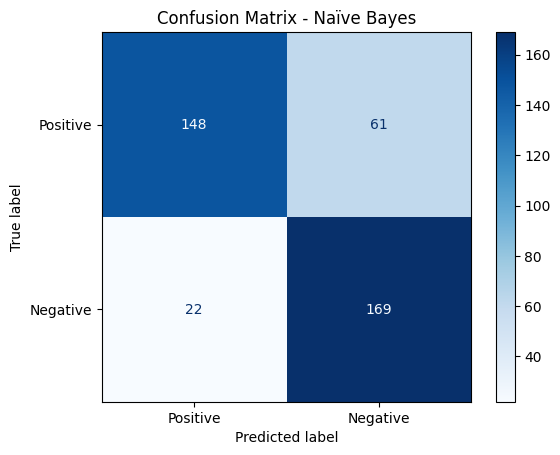

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['pos', 'neg'])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Positive', 'Negative'])
disp.plot(cmap='Blues', values_format='d')

plt.title('Confusion Matrix - Naïve Bayes')
plt.show()

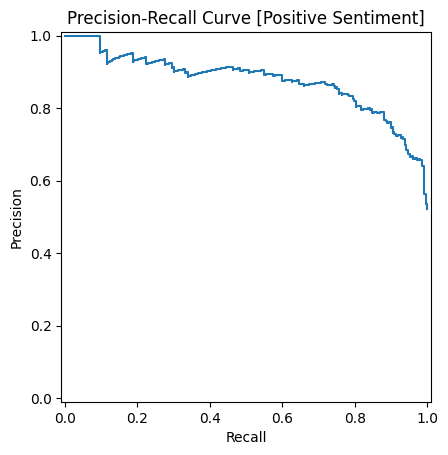

In [ ]:
y_probs = model.predict_proba(X_test)[:, 1]  # Get probs for the positive class
precision, recall, _ = precision_recall_curve(y_test, y_probs, pos_label='pos')

disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title("Precision-Recall Curve [Positive Sentiment]")
plt.show()

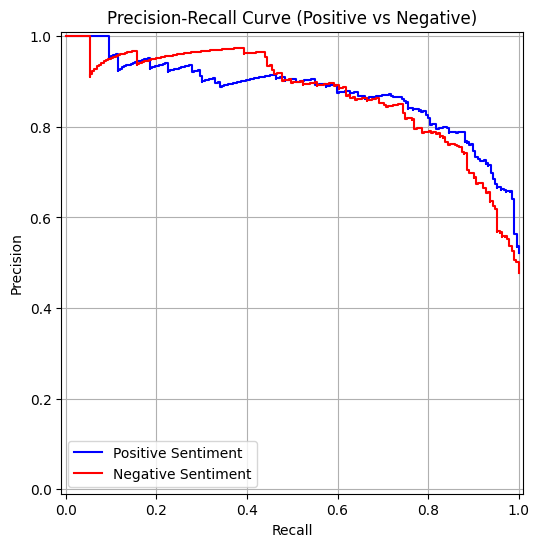

In [ ]:
y_probs = model.predict_proba(X_test)

precision_pos, recall_pos, _ = precision_recall_curve(y_test, y_probs[:, 1], pos_label='pos')
precision_neg, recall_neg, _ = precision_recall_curve(y_test, y_probs[:, 0], pos_label='neg')

plt.figure(figsize=(8, 6))
disp_pos = PrecisionRecallDisplay(precision=precision_pos, recall=recall_pos)
disp_neg = PrecisionRecallDisplay(precision=precision_neg, recall=recall_neg)

disp_pos.plot(ax=plt.gca(), name='Positive Sentiment', color='blue')
disp_neg.plot(ax=plt.gca(), name='Negative Sentiment', color='red')

plt.title("Precision-Recall Curve (Positive vs Negative)")
plt.grid(True)
plt.show()